In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [2]:
df = pd.read_csv("noise.csv")
df.head()


,participant,timestamp,max_decibel,min_decibel,std_decibel,mean_decibel,num_samples,timestamp_UTC
0,AMdzA,2023-07-12 09:58:50.683346,82.442616,75.669046,2.546522,78.773206,8,1.689149e+09
1,AMdzA,2023-07-12 22:45:28.086004,90.308999,57.443391,11.678699,73.681416,11,1.689195e+09
2,AMdzA,2023-07-15 10:10:53.897088,87.484597,81.643401,1.710924,84.183502,10,1.689409e+09
3,AMdzA,2023-07-15 16:17:19.739852,90.308999,71.728635,5.227986,85.624540,11,1.689431e+09
4,AMdzA,2023-07-16 16:02:16.085235,89.766766,71.079139,5.254087,82.704595,10,1.689516e+09


In [4]:
# Check data info
df.info()

# Check for missing values
print(df.isnull().sum())

# Quick stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239798 entries, 0 to 239797
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   participant    239798 non-null  object 
 1   timestamp      239798 non-null  object 
 2   max_decibel    239798 non-null  float64
 3   min_decibel    239798 non-null  float64
 4   std_decibel    239798 non-null  float64
 5   mean_decibel   239798 non-null  float64
 6   num_samples    239798 non-null  int64  
 7   timestamp_UTC  239798 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.6+ MB
participant      0
timestamp        0
max_decibel      0
min_decibel      0
std_decibel      0
mean_decibel     0
num_samples      0
timestamp_UTC    0
dtype: int64


,max_decibel,min_decibel,std_decibel,mean_decibel,num_samples,timestamp_UTC
count,239798.000000,239798.000000,239798.000000,239798.000000,239798.000000,2.397980e+05
mean,61.397467,39.322289,6.228257,52.302468,11.498319,1.690284e+09
std,16.687292,19.579931,4.776235,15.913271,0.926236,7.239254e+05
min,0.000265,-6.020335,0.000000,-5.518618,1.000000,1.689026e+09
25%,49.426099,24.349944,2.571682,39.697796,11.000000,1.689661e+09
50%,61.993878,38.840426,5.058132,52.091959,12.000000,1.690285e+09
75%,74.753658,53.909899,8.446883,64.636528,12.000000,1.690906e+09
max,90.308999,90.309131,35.372456,90.309131,66.000000,1.691552e+09


In [5]:
# Replace impossible (negative) noise readings with NaN
for col in ['max_decibel', 'min_decibel', 'mean_decibel']:
    df.loc[df[col] < 0, col] = np.nan

# Handle extreme num_samples (cap to 20)
df.loc[df['num_samples'] > 20, 'num_samples'] = 20

# Interpolate missing numeric values
num_cols = ['max_decibel', 'min_decibel', 'std_decibel', 'mean_decibel', 'num_samples']
df[num_cols] = df[num_cols].interpolate(method='linear')

# Verify cleaning
print(df.describe())


         max_decibel    min_decibel    std_decibel   mean_decibel  \
count  239798.000000  239798.000000  239798.000000  239798.000000   
mean       61.397467      39.328725       6.228257      52.303249   
std        16.687292      19.570094       4.776235      15.911120   
min         0.000265       0.000265       0.000000       0.464259   
25%        49.426099      24.349944       2.571682      39.697796   
50%        61.993878      38.840426       5.058132      52.091959   
75%        74.753658      53.909899       8.446883      64.636528   
max        90.308999      90.309131      35.372456      90.309131   

         num_samples  timestamp_UTC  
count  239798.000000   2.397980e+05  
mean       11.497510   1.690284e+09  
std         0.902033   7.239254e+05  
min         1.000000   1.689026e+09  
25%        11.000000   1.689661e+09  
50%        12.000000   1.690285e+09  
75%        12.000000   1.690906e+09  
max        20.000000   1.691552e+09  


In [14]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def clean_and_normalize_csv(input_path, output_path, num_cap=20):
    # ✅ Create output folder if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # ✅ Read the file
    df = pd.read_csv(input_path)

    num_cols = ['max_decibel', 'min_decibel', 'std_decibel', 'mean_decibel', 'num_samples']

    # Replace invalid (negative) values with NaN
    for col in ['max_decibel', 'min_decibel', 'mean_decibel']:
        df.loc[df[col] < 0, col] = None

    # Cap num_samples to a max realistic value
    df.loc[df['num_samples'] > num_cap, 'num_samples'] = num_cap

    # Fill missing values using interpolation
    df[num_cols] = df[num_cols].interpolate(method='linear')

    # Normalize numeric columns
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    # ✅ Save cleaned file
    df.to_csv(output_path, index=False)
    print(f"✅ Cleaned and normalized file saved at: {output_path}")

    return df


In [15]:
clean_df = clean_and_normalize_csv("noise.csv", "UpdatedCSV/noise_cleaned.csv")


✅ Cleaned and normalized file saved at: UpdatedCSV/noise_cleaned.csv


In [16]:
clean_df.head()


,participant,timestamp,max_decibel,min_decibel,std_decibel,mean_decibel,num_samples,timestamp_UTC
0,AMdzA,2023-07-12 09:58:50.683346,0.912895,0.837889,0.071992,0.871602,0.368421,1.689149e+09
1,AMdzA,2023-07-12 22:45:28.086004,1.000000,0.636074,0.330164,0.814929,0.526316,1.689195e+09
2,AMdzA,2023-07-15 10:10:53.897088,0.968725,0.904043,0.048369,0.931820,0.473684,1.689409e+09
3,AMdzA,2023-07-15 16:17:19.739852,1.000000,0.794256,0.147798,0.947859,0.526316,1.689431e+09
4,AMdzA,2023-07-16 16:02:16.085235,0.993996,0.787064,0.148536,0.915359,0.473684,1.689516e+09


In [17]:
clean_df.describe()


,max_decibel,min_decibel,std_decibel,mean_decibel,num_samples,timestamp_UTC
count,239798.000000,239798.000000,239798.000000,239798.000000,239798.000000,2.397980e+05
mean,0.679859,0.435488,0.176076,0.576983,0.552501,1.690284e+09
std,0.184780,0.216702,0.135027,0.177095,0.047475,7.239254e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.689026e+09
25%,0.547298,0.269627,0.072703,0.436681,0.526316,1.689661e+09
50%,0.686463,0.430081,0.142996,0.574632,0.578947,1.690285e+09
75%,0.827754,0.596947,0.238798,0.714256,0.578947,1.690906e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.691552e+09


In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

def clean_and_normalize_csv(input_path, output_path):
    # Load CSV
    df = pd.read_csv(input_path)

    # 1️⃣ Handle missing/wrong data
    df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
    df = df.interpolate(method='linear')
    df = df.fillna(method='bfill').fillna(method='ffill')

    # 2️⃣ Normalize numeric columns (0–1 scale)
    num_cols = df.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    # Create folder if not exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save cleaned file
    df.to_csv(output_path, index=False)
    print(f"✅ Cleaned + normalized file saved to: {output_path}")

# Apply to noise and screen
clean_and_normalize_csv("noise.csv", "UpdatedCSV/noise_cleaned.csv")
clean_and_normalize_csv("screen.csv", "UpdatedCSV/screen_cleaned.csv")


C:\Users\ishit\AppData\Local\Temp\ipykernel_39352\2518439144.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')
C:\Users\ishit\AppData\Local\Temp\ipykernel_39352\2518439144.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')


✅ Cleaned + normalized file saved to: UpdatedCSV/noise_cleaned.csv


C:\Users\ishit\AppData\Local\Temp\ipykernel_39352\2518439144.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')
C:\Users\ishit\AppData\Local\Temp\ipykernel_39352\2518439144.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')


✅ Cleaned + normalized file saved to: UpdatedCSV/screen_cleaned.csv


In [23]:
pd.read_csv("UpdatedCSV/noise_cleaned.csv").head()


,participant,timestamp,max_decibel,min_decibel,std_decibel,mean_decibel,num_samples,timestamp_UTC
0,AMdzA,2023-07-12 09:58:50.683346,0.912895,0.848021,0.071992,0.879618,0.107692,0.048426
1,AMdzA,2023-07-12 22:45:28.086004,1.000000,0.658819,0.330164,0.826483,0.153846,0.066635
2,AMdzA,2023-07-15 10:10:53.897088,0.968725,0.910041,0.048369,0.936077,0.138462,0.151323
3,AMdzA,2023-07-15 16:17:19.739852,1.000000,0.807115,0.147798,0.951114,0.153846,0.160027
4,AMdzA,2023-07-16 16:02:16.085235,0.993996,0.800373,0.148536,0.920644,0.138462,0.193873


In [22]:
pd.read_csv("UpdatedCSV/screen_cleaned.csv").head()


,participant,timestamp,screen_event,timestamp_UTC
0,AMdzA,2023-07-11 06:20:01.758140,SCREEN_ON,0.009012
1,AMdzA,2023-07-11 06:20:31.715180,SCREEN_OFF,0.009024
2,AMdzA,2023-07-11 06:30:02.199423,SCREEN_ON,0.009250
3,AMdzA,2023-07-11 06:30:18.047585,SCREEN_OFF,0.009256
4,AMdzA,2023-07-11 06:30:19.136981,SCREEN_ON,0.009256


In [24]:
import pandas as pd

# Load original data
noise_raw = pd.read_csv("noise.csv")
screen_raw = pd.read_csv("screen.csv")

# Summaries before cleaning
print("=== Noise.csv (Before Cleaning) ===")
print(noise_raw.describe())
print("\nMissing values per column:")
print(noise_raw.isna().sum())

print("\n=== Screen.csv (Before Cleaning) ===")
print(screen_raw.describe())
print("\nMissing values per column:")
print(screen_raw.isna().sum())


=== Noise.csv (Before Cleaning) ===
         max_decibel    min_decibel    std_decibel   mean_decibel  \
count  239798.000000  239798.000000  239798.000000  239798.000000   
mean       61.397467      39.322289       6.228257      52.302468   
std        16.687292      19.579931       4.776235      15.913271   
min         0.000265      -6.020335       0.000000      -5.518618   
25%        49.426099      24.349944       2.571682      39.697796   
50%        61.993878      38.840426       5.058132      52.091959   
75%        74.753658      53.909899       8.446883      64.636528   
max        90.308999      90.309131      35.372456      90.309131   

         num_samples  timestamp_UTC  
count  239798.000000   2.397980e+05  
mean       11.498319   1.690284e+09  
std         0.926236   7.239254e+05  
min         1.000000   1.689026e+09  
25%        11.000000   1.689661e+09  
50%        12.000000   1.690285e+09  
75%        12.000000   1.690906e+09  
max        66.000000   1.691552e+09  


In [25]:
# Load cleaned data
noise_clean = pd.read_csv("UpdatedCSV/noise_cleaned.csv")
screen_clean = pd.read_csv("UpdatedCSV/screen_cleaned.csv")

# Summaries after cleaning
print("=== Noise.csv (After Cleaning) ===")
print(noise_clean.describe())
print("\nMissing values per column:")
print(noise_clean.isna().sum())

print("\n=== Screen.csv (After Cleaning) ===")
print(screen_clean.describe())
print("\nMissing values per column:")
print(screen_clean.isna().sum())


=== Noise.csv (After Cleaning) ===
         max_decibel    min_decibel    std_decibel   mean_decibel  \
count  239798.000000  239798.000000  239798.000000  239798.000000   
mean        0.679859       0.470704       0.176076       0.603386   
std         0.184780       0.203260       0.135027       0.166061   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.547298       0.315275       0.072703       0.471851   
50%         0.686463       0.465701       0.142996       0.601189   
75%         0.827754       0.622138       0.238798       0.732096   
max         1.000000       1.000000       1.000000       1.000000   

         num_samples  timestamp_UTC  
count  239798.000000  239798.000000  
mean        0.161513       0.497734  
std         0.014250       0.286585  
min         0.000000       0.000000  
25%         0.153846       0.251333  
50%         0.169231       0.498279  
75%         0.169231       0.744064  
max         1.000000       1.000000  



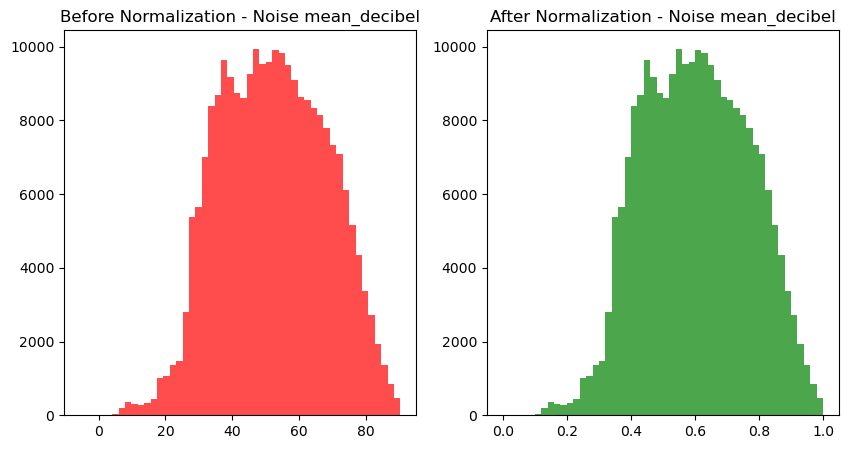

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(noise_raw['mean_decibel'], bins=50, color='red', alpha=0.7)
plt.title("Before Normalization - Noise mean_decibel")

plt.subplot(1,2,2)
plt.hist(noise_clean['mean_decibel'], bins=50, color='green', alpha=0.7)
plt.title("After Normalization - Noise mean_decibel")
plt.show()
